In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [4]:
training_set=train_datagen.flow_from_directory('D:\\machine learning practice\\cats and dogs classification\\training_set\\training_set',
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 8005 images belonging to 2 classes.


In [6]:
test_set=train_datagen.flow_from_directory('D:\\machine learning practice\\cats and dogs classification\\test_set\\test_set',
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 2023 images belonging to 2 classes.


 Creating a Sequential Mode

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation=('relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

compiling the model

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,801 (14.10 MB)

 Trainable params: 3,696,801 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
epochs=3
history=model.fit(training_set, epochs=epochs, validation_data=test_set)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 182s 715ms/step - accuracy: 0.6068 - loss: 0.6611 - val_accuracy: 0.6772 - val_loss: 0.6323
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 73s 287ms/step - accuracy: 0.6594 - loss: 0.6156 - val_accuracy: 0.6906 - val_loss: 0.5960
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 284ms/step - accuracy: 0.6896 - loss: 0.5836 - val_accuracy: 0.7034 - val_loss: 0.5737


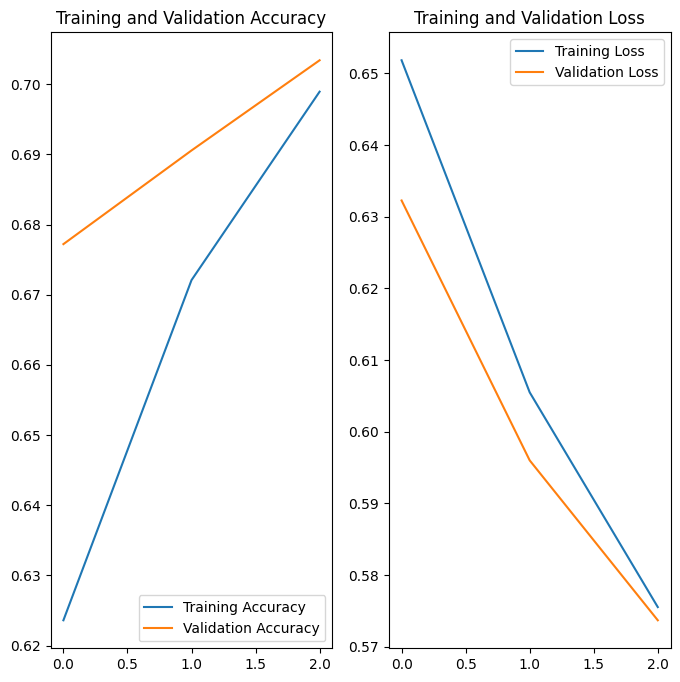

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
from keras.preprocessing import image

cat_image = image.load_img("D:\\machine learning practice\\cats and dogs classification\\test_set\\test_set\\cats\\cat.4003.jpg", target_size=(64, 64))


In [30]:
import numpy as np
cat_image=image.img_to_array(cat_image)
cat_image = np.expand_dims(cat_image, axis=0) 
result=model.predict(cat_image)
test_set.class_indices
if result[0][0]==1:
    predication='dog'
else:
    predication='cat'
print(predication)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
cat
